In [1]:
import pandas as pd
import numpy as np

import os, sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
is_run_first_time = True

In [3]:
%%time
# Train Directory

if is_run_first_time:

  !wget https://drive.google.com/file/d/1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv/view
  !gdown 1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv

  !unzip -q /content/ACGPN_traindata.zip -d Train_Dir

--2022-10-28 06:46:59--  https://drive.google.com/file/d/1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv/view
Resolving drive.google.com (drive.google.com)... 172.253.114.101, 172.253.114.139, 172.253.114.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.114.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view’

view                    [ <=>                ]  72.40K  --.-KB/s    in 0.004s  

2022-10-28 06:46:59 (20.0 MB/s) - ‘view’ saved [74139]

Downloading...
From: https://drive.google.com/uc?id=1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv
To: /content/ACGPN_traindata.zip
100% 511M/511M [00:04<00:00, 105MB/s]
CPU times: user 285 ms, sys: 64.7 ms, total: 350 ms
Wall time: 29 s


In [4]:
%%time
# Test Directory

if is_run_first_time:

  !wget https://drive.google.com/file/d/1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR/view
  !gdown 1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR

  !unzip -q /content/Data_preprocessing.zip -d Test_Dir

--2022-10-28 06:47:28--  https://drive.google.com/file/d/1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR/view
Resolving drive.google.com (drive.google.com)... 172.253.114.101, 172.253.114.139, 172.253.114.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.114.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view.1’

view.1                  [ <=>                ]  72.41K  --.-KB/s    in 0.003s  

2022-10-28 06:47:28 (24.6 MB/s) - ‘view.1’ saved [74146]

Downloading...
From: https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR
To: /content/Data_preprocessing.zip
100% 143M/143M [00:00<00:00, 149MB/s]
CPU times: user 91.6 ms, sys: 29 ms, total: 121 ms
Wall time: 6.92 s


In [5]:
test_dir = '/content/Test_Dir'
train_dir = '/content/Train_Dir'

In [6]:
def get_dir_n_files(root_dir):

  """
  get number of files in a directory and all its subdirectories
  """

  dir_n_files = pd.DataFrame({'Directoy Path':[], 'Sub Directories':[], 'Number of Files':[]})

  for dir_path, dirs, files in os.walk(root_dir):
    dir_n_files = dir_n_files.append({'Directoy Path':dir_path, 'Sub Directories':dirs, 'Number of Files':len(files)}, ignore_index=True)

  return dir_n_files

In [7]:
# Check number of files and directories in test directory 

get_dir_n_files(test_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/Test_Dir,"[test_label, test_img, test_colormask, test_ed...",0.0
1,/content/Test_Dir/test_label,[],2032.0
2,/content/Test_Dir/test_img,[],2032.0
3,/content/Test_Dir/test_colormask,[],10000.0
4,/content/Test_Dir/test_edge,[],2032.0
5,/content/Test_Dir/test_color,[],2032.0
6,/content/Test_Dir/test_mask,[],12000.0
7,/content/Test_Dir/test_pose,[],2032.0


In [8]:
# Check number of files and directories in train directory 

get_dir_n_files(train_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/Train_Dir,"[train_label, train_colormask, train_color, tr...",0.0
1,/content/Train_Dir/train_label,[],14221.0
2,/content/Train_Dir/train_colormask,[],50000.0
3,/content/Train_Dir/train_color,[],14221.0
4,/content/Train_Dir/train_edge,[],14221.0
5,/content/Train_Dir/train_mask,[],12000.0
6,/content/Train_Dir/train_img,[],14221.0
7,/content/Train_Dir/train_pose,[],14221.0


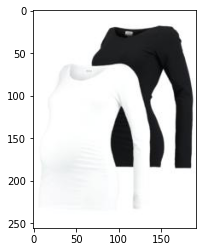

In [9]:
img = mpimg.imread(test_dir+'/test_color/000001_1.jpg')
imgplot = plt.imshow(img)
plt.show()